<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Александр, рад приветствовать тебя! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />

<font color='green'>Привет Николай ! Все доделал. Жду твоих комментариев . Спасибо </font>


# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go
import numpy as np
import itertools
import warnings
warnings.filterwarnings('ignore')

In [237]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60

In [238]:
train = pd.read_csv('gold_recovery_train.csv')

In [239]:
test = pd.read_csv('gold_recovery_test.csv')

In [240]:
df = pd.read_csv('gold_recovery_full.csv')

In [241]:
df.shape ,\
train.shape ,\
test.shape

((22716, 87), (16860, 87), (5856, 53))

Видно, что при разделении не были утеряны данные. Также мы видим, что кол-во признаков в тестовой выборке меньше, чем в обучающей и исходной. 

Это связано с тем, что некоторые параметры недоступны и замеряются / рассчитываются позже.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
принято)

In [242]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,...,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,...,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,14.27,4.59,9.00,2.49,25.88,-499.99,23.89,-500.37,23.97,-500.09,22.09,-499.45,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,123.82,11.32,7.25,0.99,8.60,10.35,19.17,33.97,16.49,3.12,6.47,2.42,1601.56,-500.00,1600.39,-500.61,1602.00,-500.87,1599.54,-499.83,...,1599.67,-449.95,1599.85,-449.95,1399.18,-449.94,1400.32,-450.53,14.12,4.62,8.84,2.46,26.01,-499.93,23.89,-499.95,23.91,-499.44,23.96,-499.90,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,122.27,11.32,7.25,1.00,7.22,8.50,15.98,28.26,16.02,2.96,6.84,2.26,1599.97,-500.95,1600.66,-499.68,1600.30,-500.73,1600.45,-500.05,...,1600.01,-449.91,1597.73,-450.13,1400.94,-450.03,1400.23,-449.79,13.73,4.48,9.12,2.32,25.94,-499.18,23.96,-499.85,23.97,-500.01,23.95,-499.94,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,117.99,11.91,7.25,1.01,9.09,9.99,19.20,33.04,16.48,3.11,6.55,2.28,1601.34,-498.98,1601.44,-500.32,1599.58,-500.89,1602.65,-500.59,...,1600.36,-450.03,1599.76,-

In [243]:
train.tail()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16855,2018-08-18 06:59:59,3.22,11.36,6.80,46.71,73.76,8.77,3.14,10.40,1.53,123.38,8.03,6.50,1.30,6.56,12.45,7.06,32.94,22.85,6.53,3.93,2.31,1648.42,-400.38,1648.74,-400.36,1648.58,-399.36,1648.83,-399.67,...,1047.96,-498.41,946.64,-499.15,849.66,-499.21,849.76,-497.45,0.00,0.00,0.00,0.00,35.04,-499.05,29.91,-499.98,26.00,-499.95,22.99,-499.97,23.03,-501.17,20.01,-499.74,18.01,-499.83,13.00,-500.16,20.01,-501.30
16856,2018-08-18 07:59:59,3.20,11.35,6.86,46.87,69.05,8.90,3.13,10.55,1.61,120.88,7.96,6.50,1.30,6.61,12.62,7.54,32.93,23.00,6.63,4.09,2.46,1649.82,-399.93,1649.36,-399.72,1648.66,-401.20,1649.73,-400.64,...,1048.57,-500.93,949.77,-500.02,848.52,-500.29,850.01,-496.82,0.00,0.00,0.00,0.00,35.03,-499.89,29.92,-499.95,26.03,-500.38,22.99,-500.08,22.96,-501.61,20.04,-500.25,18.00,-500.40,12.95,-499.90,19.97,-501.04
16857,2018-08-18 08:59:59,3.11,11.43,6.89,46.80,67.00,8.53,2.91,11.12,1.60,105.67,7.96,6.50,1.32,7.13,12.63,7.94,31.86,22.30,6.28,4.46,2.61,1649.17,-399.89,1649.20,-399.68,1647.90,-399.99,1649.77,-399.83,...,1049.60,-500.55,952.70,-502.35,849.02,-500.51,850.46,-506.90,0.00,0.00,0.00,0.00,35.00,-501.08,29.99,-611.86,25.95,-500.07,22.97,-499.84,23.02,-501.71,19.95,-499.86,18.02,-500.45,13.02,-499.91,19.99,-501.52
16858,2018-08-18 09:59:59,3.37,11.63,6.80,46.41,65.52,8.78,2.82,10.46,1.60,98.88,7.98,6.50,1.24,7.49,12.01,6.94,30.77,22.71,6.25,3.56,2.80,1646.55,-398.98,1648.21,-400.38,1648.92,-399.52,1651.50,-399.75,...,1054.01,-500.24,944.14,-496.87,851.59,-499.04,851.35,-499.12,0.00,0.00,0.00,0.00,34.98,-498.13,29.97,-586.01,25.97,-499.61,22.96,-499.82,23.02,-501.15,20.05,-500.31,17.98,-499.27,12.99,-499.98,20.01,-500.63
16859,2018-08-18 10:59:59,3.60,11.74,6.72,46.30,70.28,8.41,2.52,10.65,1.39,95.25,8.08,6.50,1.28,7.54,11.65,6.20,30.36,22.74,6.08,3.03,2.71,1648.76,-399.86,1650.14,-399.96,1648.83,-400.59,1649.46,-400.67,...,1047.28,-500.35,948.76,-498

In [244]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,-500.70,1399.00,-499.49,13.13,5.64,489.79,62.71,42.02,12.08,16.92,6.15,16.87,6.15,1001.85,-350.30,1249.74,-399.11,1249.75,-399.40,1198.29,-399.49,999.47,-399.53,949.57,-398.18,24.94,-500.49,14.95,-500.01,20.02,-450.40,13.99,-449.83,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,-499.24,1399.51,-500.42,13.04,5.53,490.10,61.96,41.19,11.92,17.00,6.00,17.00,6.00,998.69,-350.43,1248.40,-399.95,1249.51,-399.63,1200.51,-399.94,1000.00,-399.49,950.20,-405.79,24.92,-499.81,14.93,-500.76,19.99,-450.11,14.09,-450.06,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,-502.15,1399.50,-499.72,13.14,5.43,489.62,66.90,42.55,12.09,16.99,5.85,16.98,5.85,998.52,-349.78,1247.44,-400.26,1248.21,-401.07,1199.77,-400.79,999.93,-399.24,950.32,-400.86,24.91,-500.30,15.00,-500.99,20.04,-450.26,14.08,-449.66,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,-498.36,1401.07,-501.04,12.40,5.11,476.62,59.87,41.06,12.18,16.53,5.80,16.52,5.80,1000.28,-350.17,1251.32,-398.66,1250.49,-399.75,1199.40,-397.50,1001.93,-400.44,950.74,-399.80,24.89,-499.38,14.92,-499.86,20.03,-449.37,14.01,-449.53,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,-500.81,1399.48,-499.37,11.33,4.77,488.25,63.32,41.27,11.29,13.61,5.74,13.65,5.74,996.54,-350.56,1304.66,-399.51,1306.46,-399.05,1248.70,-400.88,1058.84,-398.99,949.65,-399.28,24.89,-499.36,14.98,-500.19,19.96,-450.64,14.01,-450.02,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


In [245]:
test.tail()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5851,2017-12-31 19:59:59,173.96,15.96,8.07,0.90,1401.93,-499.73,1401.44,-499.19,1399.81,-499.60,1400.33,-499.24,11.64,4.70,521.69,66.76,42.02,10.55,10.11,7.20,10.11,7.20,1399.94,-300.00,1049.64,-500.07,951.92,-499.65,852.34,-498.46,851.44,-500.29,851.46,-499.74,21.91,-499.92,19.91,-499.73,24.94,-500.10,12.97,-499.95,14.00,-500.16,12.07,-499.67,7.98,-499.52,5.93,-499.97,8.99,-499.76
5852,2017-12-31 20:59:59,172.91,16.00,8.07,0.90,1447.08,-494.72,1448.85,-465.96,1443.89,-503.59,1447.65,-480.40,11.34,4.48,530.20,62.56,41.10,10.25,9.98,7.20,9.98,7.20,1406.12,-299.06,1055.72,-498.25,956.85,-497.40,855.39,-495.70,852.07,-499.44,851.33,-496.58,25.32,-497.03,23.31,-498.89,26.37,-499.22,17.70,-499.55,16.75,-496.03,13.37,-499.12,9.29,-496.89,7.37,-499.94,8.99,-499.90
5853,2017-12-31 21:59:59,171.14,15.99,8.07,1.17,1498.84,-501.77,1499.57,-495.52,1502.75,-520.67,1502.59,-498.26,11.29,4.41,546.31,73.65,41.10,10.17,10.18,7.20,10.19,7.20,1396.20,-300.21,1047.88,-499.60,948.96,-499.55,856.33,-500.10,850.61,-499.47,850.28,-498.51,29.08,-500.53,26.89,-500.98,28.00,-500.57,23.00,-500.48,19.99,-499.79,15.10,-499.94,10.99,-498.35,9.02,-500.04,8.98,-497.79
5854,2017-12-31 22:59:59,179.70,15.44,8.07,1.50,1498.47,-500.48,1497.99,-519.20,1496.57,-487.48,1502.69,-501.57,11.29,4.34,547.33,78.07,41.72,10.07,10.73,7.20,10.73,7.20,1403.94,-300.03,1049.80,-499.80,950.77,-500.37,847.65,-499.92,849.41,-500.38,850.08,-500.48,29.10,-499.69,27.05,-499.86,27.98,-499.91,23.05,-499.74,19.96,-499.96,15.03,-499.72,11.01,-499.99,9.01,-499.94,9.01,-500.15
5855,2017-12-31 23:59:59,181.56,15.00,8.07,1.62,1498.10,-499.80,1501.74,-505.15,1499.54,-492.43,1499.67,-499.77,10.90,4.09,564.54,77.68,40.89,9.70,10.79,7.20,10.79,7.20,1400.61,-299.99,1052.78,-499.76,950.79,-499.36,850.64,-500.43,850.37,-500.82,850.68,-498.54,29.10,-500.43,26.89,-500.09,28.02,-500.17,23.01,-500.22,20.03,-500.73,14.91,-499.95,10.99,-500.66,8.99,-500.34,8.99,-500.76


In [246]:
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,...,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,...,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,14.27,4.59,9.00,2.49,25.88,-499.99,23.89,-500.37,23.97,-500.09,22.09,-499.45,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,123.82,11.32,7.25,0.99,8.60,10.35,19.17,33.97,16.49,3.12,6.47,2.42,1601.56,-500.00,1600.39,-500.61,1602.00,-500.87,1599.54,-499.83,...,1599.67,-449.95,1599.85,-449.95,1399.18,-449.94,1400.32,-450.53,14.12,4.62,8.84,2.46,26.01,-499.93,23.89,-499.95,23.91,-499.44,23.96,-499.90,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,122.27,11.32,7.25,1.00,7.22,8.50,15.98,28.26,16.02,2.96,6.84,2.26,1599.97,-500.95,1600.66,-499.68,1600.30,-500.73,1600.45,-500.05,...,1600.01,-449.91,1597.73,-450.13,1400.94,-450.03,1400.23,-449.79,13.73,4.48,9.12,2.32,25.94,-499.18,23.96,-499.85,23.97,-500.01,23.95,-499.94,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,117.99,11.91,7.25,1.01,9.09,9.99,19.20,33.04,16.48,3.11,6.55,2.28,1601.34,-498.98,1601.44,-500.32,1599.58,-500.89,1602.65,-500.59,...,1600.36,-450.03,1599.76,-

In [247]:
df.tail()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
22711,2018-08-18 06:59:59,3.22,11.36,6.80,46.71,73.76,8.77,3.14,10.40,1.53,123.38,8.03,6.50,1.30,6.56,12.45,7.06,32.94,22.85,6.53,3.93,2.31,1648.42,-400.38,1648.74,-400.36,1648.58,-399.36,1648.83,-399.67,...,1047.96,-498.41,946.64,-499.15,849.66,-499.21,849.76,-497.45,0.00,0.00,0.00,0.00,35.04,-499.05,29.91,-499.98,26.00,-499.95,22.99,-499.97,23.03,-501.17,20.01,-499.74,18.01,-499.83,13.00,-500.16,20.01,-501.30
22712,2018-08-18 07:59:59,3.20,11.35,6.86,46.87,69.05,8.90,3.13,10.55,1.61,120.88,7.96,6.50,1.30,6.61,12.62,7.54,32.93,23.00,6.63,4.09,2.46,1649.82,-399.93,1649.36,-399.72,1648.66,-401.20,1649.73,-400.64,...,1048.57,-500.93,949.77,-500.02,848.52,-500.29,850.01,-496.82,0.00,0.00,0.00,0.00,35.03,-499.89,29.92,-499.95,26.03,-500.38,22.99,-500.08,22.96,-501.61,20.04,-500.25,18.00,-500.40,12.95,-499.90,19.97,-501.04
22713,2018-08-18 08:59:59,3.11,11.43,6.89,46.80,67.00,8.53,2.91,11.12,1.60,105.67,7.96,6.50,1.32,7.13,12.63,7.94,31.86,22.30,6.28,4.46,2.61,1649.17,-399.89,1649.20,-399.68,1647.90,-399.99,1649.77,-399.83,...,1049.60,-500.55,952.70,-502.35,849.02,-500.51,850.46,-506.90,0.00,0.00,0.00,0.00,35.00,-501.08,29.99,-611.86,25.95,-500.07,22.97,-499.84,23.02,-501.71,19.95,-499.86,18.02,-500.45,13.02,-499.91,19.99,-501.52
22714,2018-08-18 09:59:59,3.37,11.63,6.80,46.41,65.52,8.78,2.82,10.46,1.60,98.88,7.98,6.50,1.24,7.49,12.01,6.94,30.77,22.71,6.25,3.56,2.80,1646.55,-398.98,1648.21,-400.38,1648.92,-399.52,1651.50,-399.75,...,1054.01,-500.24,944.14,-496.87,851.59,-499.04,851.35,-499.12,0.00,0.00,0.00,0.00,34.98,-498.13,29.97,-586.01,25.97,-499.61,22.96,-499.82,23.02,-501.15,20.05,-500.31,17.98,-499.27,12.99,-499.98,20.01,-500.63
22715,2018-08-18 10:59:59,3.60,11.74,6.72,46.30,70.28,8.41,2.52,10.65,1.39,95.25,8.08,6.50,1.28,7.54,11.65,6.20,30.36,22.74,6.08,3.03,2.71,1648.76,-399.86,1650.14,-399.96,1648.83,-400.59,1649.46,-400.67,...,1047.28,-500.35,948.76,-498

In [248]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [249]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

Есть пропуски . Разберемся с ними чуть позже 

#### 1.2. Проверьте, что эффективность обогащения рассчитана правильно.

#### Вычислите её на обучающей выборке для признака rougher.output.recovery. 

#### Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

Выберем нужные для расчета признаки и удаляю пропущенные значения

In [250]:
columns_check = ['rougher.output.recovery',
           'rougher.output.concentrate_au',
           'rougher.input.feed_au',
           'rougher.output.tail_au']

In [251]:
data_check = train[columns_check].dropna()

Рассчитываем эффективность обогащения после флотации

In [252]:
C = data_check['rougher.output.concentrate_au']
F = data_check['rougher.input.feed_au']
T = data_check['rougher.output.tail_au']
recovery_check = (C * (F-T)) / (F * (C - T)) * 100

Находим MAE между значением признака rougher.output.recovery и расчетным значением

In [253]:
mean_absolute_error(data_check['rougher.output.recovery'], recovery_check)

9.444891926100695e-15

In [254]:
recovery_check.tail()

16855   89.57
16856   87.72
16857   88.89
16858   89.86
16859   89.51
dtype: float64

In [255]:
data_check['rougher.output.recovery'].tail()

16855   89.57
16856   87.72
16857   88.89
16858   89.86
16859   89.51
Name: rougher.output.recovery, dtype: float64

Вывод:
    
С учетом удаления строк с пропущенными значениями MAE между расчётами и значением признака отсутствует.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
принято. Вывод не очень понял, но МАЕ вижу - нормальное))

#### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [256]:
only_train = list(itertools.filterfalse(list(test.columns).__contains__, iter(list(train.columns))))
only_train

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Данные признаки характеризуют продукт после флотации и очисток, 

а также содержат расчетные характеристики и целевые значения эффективности обогащения.

Типы: output - параметры продукта, calculation - расчётные характеристики

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
В общем, да, вывод такой. 
В тестовой выборке недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, т.к. их невозможно получить/измерить во время выполнения технологического процесса. 

#### 1.4. Проведите предобработку данных

Меняю тип признака date на datetime и создаю новые признаки year, month, day

In [257]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [258]:
df['sin_hour'] = np.sin(2*np.pi*(pd.DatetimeIndex(df['date']).hour)/24)
df['cos_hour'] = np.cos(2*np.pi*(pd.DatetimeIndex(df['date']).hour)/24)

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
факт созданя - понятен. Вот данные есть))) а цель? там дальше видно будет, наверное. Но в этом месте, раз уж они тут появилсись) тоже не помешало бы описание цели)

# 2. Анализ данных

#### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

Функция для построения графика распределения концентрации металлов на различных этапах очистк

In [259]:
def concentrate_hist(metal, title):
    x0 = df[f'rougher.input.feed_{metal}']
    x1 = df[f'rougher.output.concentrate_{metal}']
    x2 = df[f'primary_cleaner.output.concentrate_{metal}']
    x3 = df[f'final.output.concentrate_{metal}']

    fig = go.Figure()
    fig.add_trace(go.Histogram(x=x0, name='сырьё'))
    fig.add_trace(go.Histogram(x=x1, name='черновой'))
    fig.add_trace(go.Histogram(x=x2, name='первая очистка'))
    fig.add_trace(go.Histogram(x=x3, name='финальный'))
    fig.update_layout(title_text=f'Концентрация {title} на различных этапах очистки',
                      xaxis_title_text='концентрация',
                      yaxis_title_text='количество наблюдений',
                      barmode='overlay')
    fig.update_traces(opacity=0.7)
    fig.show('png')

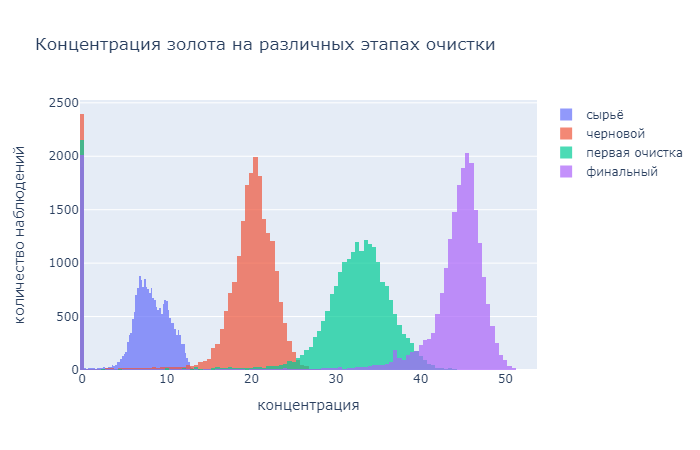

In [260]:
concentrate_hist('au', 'золота')

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
красота)

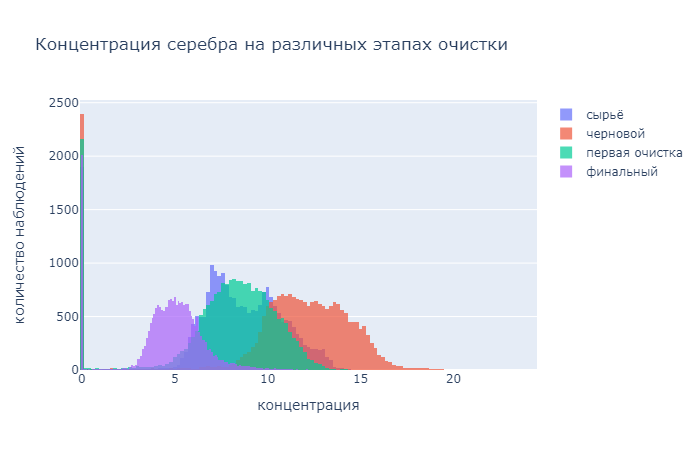

In [261]:
concentrate_hist('ag', 'серебра')

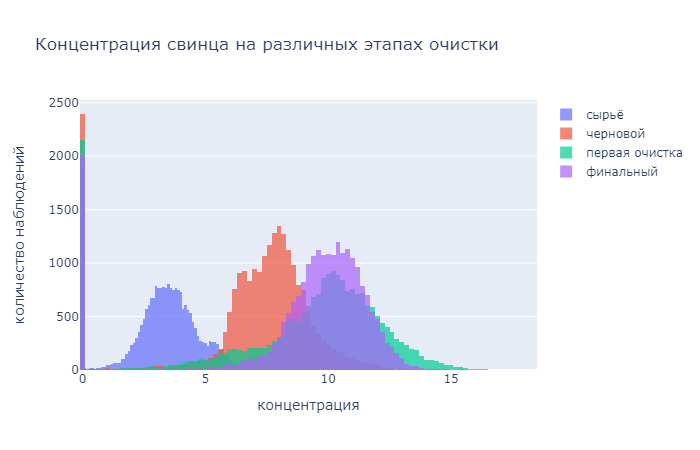

In [262]:
concentrate_hist('pb', 'свинца')

#### Вывод:
Для золота наблюдается явная зависимость увеличения концентрации по мере очистки

Концентрация серебра увеличивается после флотации и далее снижается по мере очистки

Концентрация свинца увеличивается после флотации и первой очистки, далее почти не изменяется

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Отличная графика) с Выводами согласен.<br>
А потом что-то поломалось(((( перестало строится.....

#### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. 

#### Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Функция для построения графика распределения размеров гранул сырья на обучающей и тестовой выборках

In [263]:
def feed_size_hist(step, title):
    x0 = train[f'{step}.input.feed_size']
    x1 = test[f'{step}.input.feed_size']

    fig = go.Figure()
    fig.add_trace(go.Histogram(x=x0, name='train'))
    fig.add_trace(go.Histogram(x=x1, name='test'))

    fig.update_layout(title_text=f'Распределение размеров гранул сырья для {title}',
                      xaxis_title_text='размер гранулы',
                      yaxis_title_text='количество наблюдений',
                      barmode='overlay')
    fig.update_traces(opacity=0.7)
    fig.show('png')

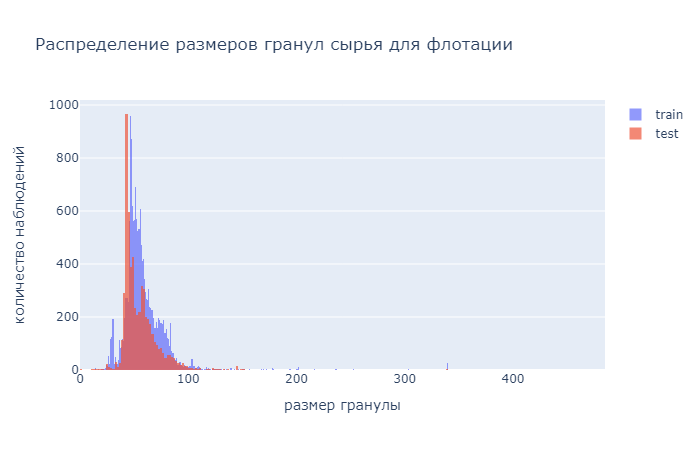

In [264]:
feed_size_hist('rougher', 'флотации')

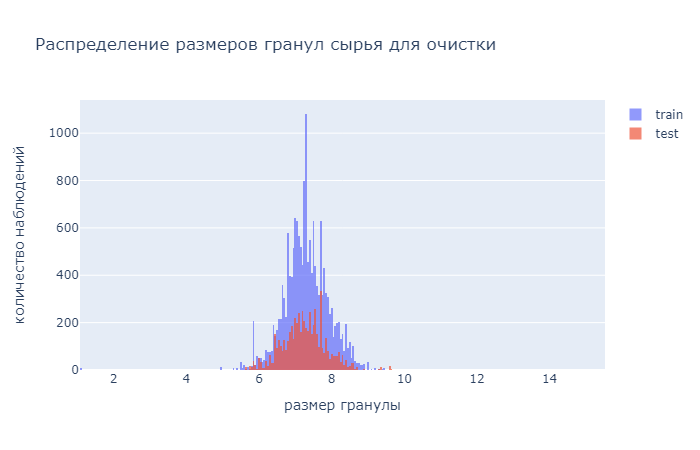

In [265]:
feed_size_hist('primary_cleaner', 'очистки')

На обоих этапах размеры гранул примерно одинаково распределены на обучающей и тестовой выборках

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
принято)

#### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье,
    
#### в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? 

#### Если они есть, стоит ли их удалять из обеих выборок? 
#### Опишите выводы и удалите аномалии.

Создаем признаки для каждого этапа с суммарной концентрацией всех веществ

In [266]:
elems = ['au', 'ag', 'pb', 'sol']

In [267]:
steps = ['rougher.input.feed_',
         'rougher.output.concentrate_', 
         'final.output.concentrate_']

In [268]:
for step in steps:
    df[step] = df[step + elems[0]] + df[step + elems[1]] + df[step + elems[2]] + df[step + elems[3]]

#### График распределения суммарной концентрации всех веществ

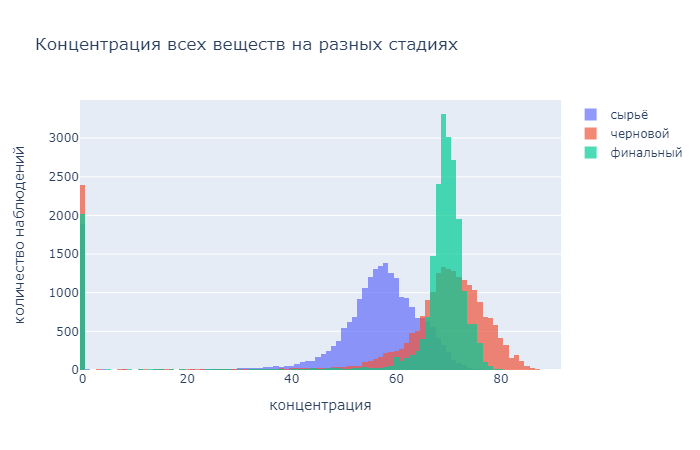

In [269]:
x1 = df['rougher.input.feed_']
x2 = df['rougher.output.concentrate_']
x3 = df['final.output.concentrate_']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x1, name='сырьё'))
fig.add_trace(go.Histogram(x=x2, name='черновой'))
fig.add_trace(go.Histogram(x=x3, name='финальный'))
fig.update_layout(title_text='Концентрация всех веществ на разных стадиях',
                xaxis_title_text='концентрация',
                yaxis_title_text='количество наблюдений',
                    barmode='overlay')
fig.update_traces(opacity=0.7)
fig.show('png')

In [270]:
df[steps].describe()

,rougher.input.feed_,rougher.output.concentrate_,final.output.concentrate_
count,22241.00,22526.00,22328.00
mean,52.27,61.80,62.48
std,17.65,23.17,20.74
min,0.00,0.00,0.00
25%,51.78,63.56,67.20
50%,56.94,69.46,69.29
75%,61.52,74.06,71.17
max,76.98,90.96,80.21


 На каждом этапе около 2000 нулевых значений. Возможно, это ошибка измерения. 

Удаляим строки, в которых на каждом из этапов суммарная концентрация всех веществ равна 0, 

как неинформативные для построения модели

In [271]:
df.shape

(22716, 95)

In [272]:
df = df[(df['rougher.input.feed_'] != 0) &
         (df['rougher.output.concentrate_'] != 0) & 
         (df['final.output.concentrate_'] != 0)]

In [273]:
df.shape

(20472, 95)

#### Вывод:
    
#### После флотации увеличивается концентрация веществ и далее в ходе очистки сокращается интервал распределения

#### с 50-90 до 60-80.

#### Удалены строки, в которых на каждом из этапов суммарная концентрация всех веществ равна 0

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Нулевые аномалии - да, с этим разобрались : просто зачем нам нулевые измерения.<br>
    
и хорошо, что не поддались искушению удалить выбросу по нижней квартиле ящика с усами..<br>
Потому что тут дело такое: наша цель - предсказывать модель на реальных данных. А вот эти выбросы - это и есть реальная концентрация. И нам важно, чтобы модель умела и их тоже обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искаусственной. Т.е. будет работать только в небольших жиапазонах - потому что обучалась только в них.<br>
    
Поэтому, тут так: выбросы - это не всегда то, от чего надо избавляться))) Ещё зависит от бизнес-задачи.

# 3. Модель

#### 3.1. Напишите функцию для вычисления итогового sMAPE

Функция для вычисления итогового sMAPE

In [187]:
def final_smape(target_r, pred_r, target_f, pred_f):
    '''
    target_r - целевой признак(эффективность обогащения чернового концентрата) 
    pred_r - предсказание эффективности обогащения чернового концентрата
    target_f - целевой признак(эффективность обогащения финального концентрата) 
    pred_f - предсказание эффективности обогащения финального концентрата
    '''
    rougher = 100/len(target_r)*np.sum(2*np.abs(pred_r-target_r)/(np.abs(target_r)+np.abs(pred_r)))
    final = 100/len(target_f)*np.sum(2*np.abs(pred_f-target_f)/(np.abs(target_f)+np.abs(pred_f)))
    return 0.25 * rougher + 0.75 * final

#### 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке.

#### Опишите выводы

Удалим сроки с пропущенными значениями

In [188]:
data = df.dropna()

Удаляим признаки, которых нет в тестовой выборке, за исключением целевых

In [189]:
targets = ['rougher.output.recovery', 'final.output.recovery']
train_targets = list(itertools.filterfalse(targets.__contains__, iter(only_train)))

In [190]:
data = data.drop(train_targets, axis=1)

Создаем переменные для целевых признаков

In [191]:
y_rougher = data['rougher.output.recovery']
y_final = data['final.output.recovery']

Чтобы избежать утечки данных, удаляю признаки rougher.output.concentrate_, final.output.concentrate_, а также удаляим

дату и целевые признаки

In [192]:
data = data.drop(['date', 'rougher.output.recovery', 'final.output.recovery',
                  'rougher.output.concentrate_', 'final.output.concentrate_'], axis=1)

Для каждого целевого признака с помощью train_test_split разбиваем данные на две выборки: обучающую и тестовую в 
    
соотношении 75 к 25.

In [193]:
X_train_r, X_test_r, y_train_r, y_test_r = \
train_test_split(data, y_rougher, test_size=0.25, random_state=42)

In [194]:
X_train_f, X_test_f, y_train_f, y_test_f = \
train_test_split(data, y_final, test_size=0.25, random_state=42)

In [195]:
(X_train_f.shape), (X_test_f.shape), (y_train_f.shape), (y_test_f.shape)

((11814, 58), (3939, 58), (11814,), (3939,))

#### Решающее дерево и случайный лес

Для DecisionTreeRegressor и RandomForestRegressor поиск будет осуществляться по гиперпараметрам max_depth.

Создаю переменную tree_params c различными вариантами значений

In [196]:
tree_params = {'max_depth': list(range(2, 10))}

Выбор гиперпараметров для решающего дерева и обучение моделей. Для поиска оптимального значения используем

GridSearchCV с кросс-валидацией на пяти подвыборках.

In [197]:
grid_dtr_r = GridSearchCV(DecisionTreeRegressor(random_state=42),
                         tree_params, cv=5, n_jobs=-1, scoring='r2') 
grid_dtr_r.fit(X_train_r, y_train_r)
params = grid_dtr_r.best_params_
dtr_r = DecisionTreeRegressor(**params, random_state = 42)
dtr_r.fit(X_train_r, y_train_r)
grid_dtr_r.best_params_

{'max_depth': 8}

In [198]:
grid_dtr_f = GridSearchCV(DecisionTreeRegressor(random_state=42),
                         tree_params, cv=5, n_jobs=-1, scoring='r2') 
grid_dtr_f.fit(X_train_f, y_train_f)
params = grid_dtr_f.best_params_
dtr_f = DecisionTreeRegressor(**params, random_state = 42)
dtr_f.fit(X_train_f, y_train_f)
grid_dtr_r.best_params_

{'max_depth': 8}

Расчёт итогового sMAPE для DecisionTreeRegressor на тестовой выборке

In [199]:
pred_rougher = dtr_r.predict(X_test_r)
pred_final = dtr_f.predict(X_test_f)
final_smape(y_test_r, pred_rougher, y_test_f, pred_final)

5.881466571719632

Выбор гиперпараметров для случайного леса и обучение моделей. Для поиска оптимального значения используем

GridSearchCV с кросс-валидацией на пяти подвыборках.

In [200]:
grid_rfr_r = GridSearchCV(RandomForestRegressor(random_state=42), tree_params, cv=5, scoring='r2', n_jobs=-1) 
grid_rfr_r.fit(X_train_r, y_train_r)
params = grid_rfr_r.best_params_
rfr_r = RandomForestRegressor(**params, random_state = 42)
rfr_r.fit(X_train_r, y_train_r)
grid_rfr_r.best_params_

{'max_depth': 9}

In [66]:
grid_rfr_f = GridSearchCV(RandomForestRegressor(random_state=42), tree_params, cv=5, scoring='r2', n_jobs=-1) 
grid_rfr_f.fit(X_train_f, y_train_f)
params = grid_rfr_f.best_params_
rfr_f = RandomForestRegressor(**params, random_state = 42)
rfr_f.fit(X_train_f, y_train_f)
grid_rfr_f.best_params_

{'max_depth': 9}

Расчёт итогового sMAPE для RandomForestRegressor на тестовой выборке

In [67]:
pred_rougher = rfr_r.predict(X_test_r)
pred_final = rfr_f.predict(X_test_f)
final_smape(y_test_r, pred_rougher, y_test_f, pred_final)

5.099312476941523

#### Линейная регрессия

Для LinearRegression поиск будет осуществляться по гиперпараметрам fit_intercept, normalize и copy_X. Создаем переменную parameters c различными вариантами значений указанных 

гиперпараметров.

In [68]:
parameters ={'fit_intercept':[True, False],
             'normalize':[True, False],
             'copy_X':[True, False]}

Выбор гиперпараметров для линейной регрессии и обучение моделей. Для поиска оптимального значения использую GridSearchCV с кросс-валидацией на пяти подвыборках.

In [69]:
grid_lr_r = GridSearchCV(LinearRegression(),
                       parameters, cv=5, n_jobs=-1, scoring='r2')
grid_lr_r.fit(X_train_r, y_train_r)
params = grid_lr_r.best_params_
lr_r = LinearRegression(**params)
lr_r.fit(X_train_r, y_train_r)
grid_lr_r.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [70]:
grid_lr_f = GridSearchCV(LinearRegression(),
                       parameters, cv=5, n_jobs=-1, scoring='r2')
grid_lr_f.fit(X_train_f, y_train_f)
params = grid_lr_f.best_params_
lr_f = LinearRegression(**params)
lr_f.fit(X_train_f, y_train_f)
grid_lr_f.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

 Расчёт итогового sMAPE для LinearRegression на тестовой выборке

In [201]:
pred_rougher = lr_r.predict(X_test_r)
pred_final = lr_f.predict(X_test_f)
final_smape(y_test_r, pred_rougher, y_test_f, pred_final)

6.0982562566305125

Вывод:
    
На тестовой выборке лучшее значение sMAPE у моделей RandomForestRegressor 5,01%. 

У DecisionTreeRegressor 5,88% и чуть меньше у LinearRegression - 6.1%

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Александр,  <br>
интересную ты работу провел.<br>
Понятно, логично, без напряжения - я прям отдыхал сейчас. Спасибо))<br>
Графичесикй анализ - здорово (пока у меня была возмоность выводить))). Отдельно хотел отметить, что не стали использовать факторы времени в модели - это здорово!!!! Потому что (а моногие поддаются искушению поднять метрику, используя даты), если мы не временные ряды прогнозируем, даты будут "засорять" модель.  
Метрика - достаточно низкая. И вообще - интересная модельная работа.<br>
вот только не понятно насколько качество модели хорошее, относительно чего?))<br>
По хорошему, здесь надо понять: наша модель предсказывает лучше, чем просто по среднему.<br>
(в формулу метрики подставить прогнозные медианные значения обучающей выборки). Получится, например, 12%. Тогда ОК. Наша модель даёт в среднем -6% выгоды<br>
Правда тут надо будет смотреть, всё-таки, разброс предсказаний - стандартное отклонение..ну это другая исотрия.<br>
<font color='red'>
Покажи, пожалуйста, сравнение и вывод относительно константной модели)
<font color='green'>    
Если говорить, что ещё было бы интересно глянуть, так это важность факторов при моделировании. Есть команда feature_importances_. Можно вывести таблицу, ну и график соотверственно. Это будет наглядно и познавательно)
Спасибо)<br>
БУДУ ЖДАТЬ ВАШИХ КОММЕНТАРИЕВ!
</b></font>

Проверим наши полученные модели на адекватность.

Для этого посчитаем итоговое значение smape для обучающей выборки в том случае, когда наша условная модель предсказывает всегда среднее значение по выборке.

А затем сравним его с полученным значением smape_total_train.

In [358]:
predict_mean_rougher_train = pd.Series(pred_rougher.mean(), index=range(0, len(pred_rougher)))
predict_mean_final_train = pd.Series(pred_final.mean(), index=range(0, len(pred_final)))
smape_total_train_by_mean = smape_total(smape(pred_final, predict_mean_rougher_train), smape(pred_final, predict_mean_final_train))
print('Итоговое sMape на обучающей выборке с предсказанием по среднему = ', smape_total_train_by_mean)

Итоговое sMape на обучающей выборке с предсказанием по среднему =  11.19605870519996


Итоговое sMape на обучающей выборке с предсказанием по среднему оказалось больше, чем итоговое sMape на обучающей выборке,

полученное 

с помощью обученных моделей. Таким образом, видим, что наши модели адекватны.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Александр, привет)<br>
спасибо, что откликнулся на мои комментарии)<br>
После этого проекта,
Самое время подумать, а какие есть как в приниципе пути к улучшению качества результатов.<br>
Попробовал систематизировать:<br>
1) качество данных на входе: ещё раз оценить аномалии, пропуски, соответствие физике (правдиво ли всё)<br>
2) Работа с моделями:<br>
- Генерация и поиск бизнес-факторов для моделирования: возможно что-то упустили, или придумать что-то гибридное из имеющихся факторов... В общем ещё раз пройтись по бизнес-цепочке процесса<br>
- Подбор самих моделей. показателей самих моделей <br>
- Подбор параметров выбранных показателей у выбранных моделей <br>
    
3)Плюс, есть же ещё параметры самого процесса: температура, скорость конвейера, сила удара чего-то там....<br> Они тоже могут помочь<br>
4) ну и разобраться ещё раз с физическими и производственными процессами. ВОзможно приниципиально иное решение можно создать.<br> 
    
В общем-то другого и нет. Только такие возможности.<br>
Если углубится в так называемый "Статистический анализ данных" (SPC) - по сути это превариетльная подготовка данных в этом проекте, можно найти какое-нибудь решение<br>
    
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
    - [ ]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке